In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn import metrics

DATA Collection and Processing

In [12]:
# loading the csv dataset to a pandas dataframe
gold_data = pd.read_csv(r"C:\Users\Mahendra\Documents\datamlproject1\gld_price_data.csv")

In [13]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
#print last 5 rows in the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [15]:
#number rows and colmns
gold_data.shape

(2290, 6)

In [16]:
# dataset information
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [17]:
#checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [18]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Always find the various columns in dataset Correlation
1.positive correlation
2.Negative correlation

In [19]:
correlation = gold_data[['SPX','GLD','USO','SLV','EUR/USD']].corr()

<Axes: >

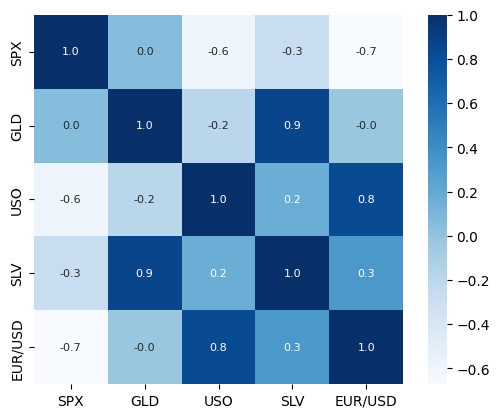

In [20]:
#constucting a heatmap to understand a correlations
plt.figure()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [24]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Mahendra\AppData\Local\Temp\ipykernel_6000\2870322291.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='yellow')


<Axes: xlabel='GLD', ylabel='Density'>

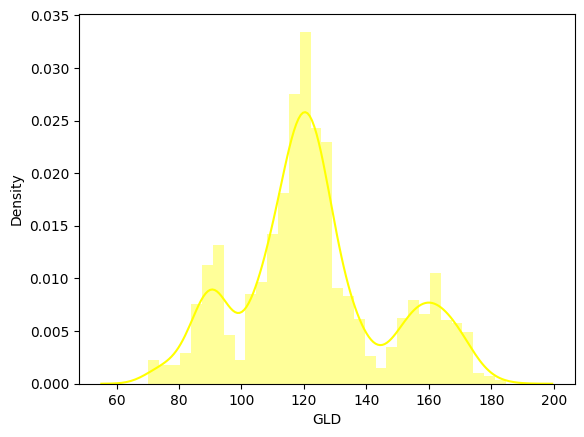

In [28]:
#check distribution of the gold price
sns.distplot(gold_data['GLD'], color='yellow')

Splitting the features and target

In [29]:
#here we are droppping a column so axis=1, for dropping row axis=0
X = gold_data.drop(['Date','GLD'], axis=1)
Y= gold_data['GLD']

In [30]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [31]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Traning data and test data

In [32]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [33]:
regressor = RandomForestRegressor(n_estimators=100)

In [34]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [35]:
#prediction on test Data
test_data_prediction = regressor.predict(X_test)

In [36]:
print(test_data_prediction)

[168.68939901  82.14929998 116.15560022 127.76500101 120.62580143
 154.81949745 150.12059928 126.1687001  117.40509878 125.95350073
 116.42910069 171.7163     141.64879858 167.85899811 115.13480027
 117.96830071 138.43400362 169.97940026 159.44110344 161.71259988
 155.15950048 125.23430031 175.5869006  157.06150408 125.16510052
  93.67839992  77.20290015 120.699      119.11009937 167.4548004
  88.16870048 125.55170044  91.03880083 117.67570028 121.09749875
 136.24030112 115.42070125 115.06430086 145.48239947 107.48810114
 104.60900249  87.19079804 126.5273007  118.08839999 154.41749911
 119.5419999  108.38759986 108.00059823  93.15000048 127.08439773
  74.8887003  113.81339938 121.39020032 111.20729892 118.85799904
 120.50469985 160.05039957 168.05200175 147.06769726  85.98659874
  94.34210014  86.74099913  90.6302     118.94870079 126.52240025
 127.50259994 169.83209915 122.33259911 117.59709879  98.53430037
 167.68120065 143.265799   131.67960221 121.23480224 121.5481992
 119.8017006

In [37]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9899203213942279


Compare the actual values and predicted values in a plot

In [38]:
#converting Y_test into a list to avoid error
Y_test = list(Y_test)


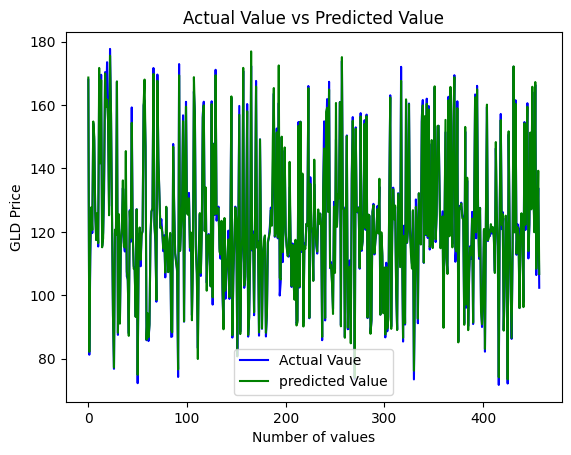

In [42]:
plt.plot(Y_test, color='blue',label='Actual Vaue')
plt.plot(test_data_prediction, color='green', label='predicted Value')
plt.title('Actual Value vs Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()